# CP 2025-26: Q2 Lecture 2 - PDE (Part 1)

### General Guidelines

> ⚠️⚠️⚠️ READ CAREFULLY ⚠️⚠️⚠️

- Do not add, delete or create cells, write the answer only in the space marked with the three dots (`...`). Where function skeletons are provided, it is assumed that that function can be called again with different inputs somewhere else. So be careful to write code outside of functions.
  - Function should be ['pure'](https://en.wikipedia.org/wiki/Pure_function), thus no side effects, unless otherwise specified.
- Run the the first cell to import all libraries when opening the notebook before running your own code.
- Read carefully what is required to be printed/returned/plotted in the answer. Please do not output what is not asked for. 
  - If you used the print function for debugging, comment it out ( Ctlr + / ) before submitting
- All plots should have title, xlabel, ylabel, and legend (if there are more than one curve on the plot)
- Use the `help()` function, consult python documentation when using new functions, or do a web search and consult [stackoverflow](https://stackoverflow.com/questions/tagged/python)
- Please read the error messages if you get any, and try to understand what they mean. Debugging code is an essential skill to develop.
- You can use `%debug` to start an IPython console in a cell (or a scratchpad cell!) after an exception has occurred to try to debug.
- You can use `%pdb` to toggle the Python DeBugger (pdb) auto start after an unhandled exception.
- In the assignments you will find some tests put in place, to help you verify your solution. If these fail you are certain you did something wrong, thus look at the hints they provide. But passing these tests does __not__ mean your solution is actually correct.

Make sure you use `python3.12` and the package versions as stated in the provided `requirements.txt`. This file should also be on the course page.

In [1]:
# Importing relevant libraries in the assignment

# This will create static plots (no zooming etc.)
# otherwise try just plain `%matplotlib`, or install a backend such as ipympl or PyQt5 and
# do or `%matplotlib ipympl` `%matplotlib qt`
%matplotlib inline

REPEAT_IMPORTS = True

if REPEAT_IMPORTS or ("IMPORTED_ALL" not in globals()):  # To save you a bit of time

    def print_import_info(package):
        print(
            "Successfully imported %-15s \tVersion: %10s"
            % (package.__name__, package.__version__)
        )

    ### Standard library imports

    import sys

    print("Python version {}".format(sys.version))
    if sys.version_info < (3, 12):
        print(
            "\u001b[31m"  # red
            "\u001b[1m"  # bold
            "WARNING: Use Python 3.12 or newer not to encounter any errors or problems later on. You can chance the the version. This sometime can be done by switching the kernel under the 'Kernel' tab."
            "\u001b[0m"  # reset
        )
    del sys  # Do not need it anymore

    ### Import third party libraries
    # Initialize self assessment helper
    import otter

    grader = otter.Notebook("Assignment_Q2_L2.ipynb")

    import os

    import numpy as np
    import numpy.typing as npt

    print_import_info(np)

    import scipy

    print_import_info(scipy)

    import matplotlib
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt

    print_import_info(matplotlib)

    IMPORTED_ALL = True
    print("Finished importing packages")
else:
    print("Already imported all packages")

Python version 3.12.10 (v3.12.10:0cc81280367, Apr  8 2025, 08:46:59) [Clang 13.0.0 (clang-1300.0.29.30)]
Successfully imported numpy           	Version:      2.3.2
Successfully imported scipy           	Version:     1.16.1
Successfully imported matplotlib      	Version:     3.10.5
Finished importing packages


## Solving transient elliptic PDE - Unsteady 1D heat equation
The 1D unsteady heat equation models the temporal and spatial distribution of temperature in a material, considering how heat diffuses over time along one dimension. In chemical engineering, it is used to analyze processes like the cooling of extruded polymers, temperature regulation in tubular reactors, and thermal management in chemical storage tanks.
\begin{equation}
\frac{dT}{dt} = \alpha\frac{d^2 T}{dx^2}
\tag{Eq. 1}
\end{equation}
where $\alpha$ is the diffusivity of the material in $m^2/s$.

### Numerical solution strategies
To solve the 1D unsteady heat equation numerically using **Finite difference method (FDM)**, we discretize the spatial domain into grid points and the time domain into discrete steps. We can then use time-integrator techniques (Euler method) to update the spatial-discretized temperature in time.
- **Forward Euler (explicit)** method, we update the temperature at each grid point based on the current temperatures, which is straightforward to implement but suffers stability issues.
- **Backward Euler (implicit)** method, on the other hand, involves solving a system of equations at each time step, allowing for larger time steps and greater stability, but at the cost of increased computational and implementation effort.

### Question 1.1: Spatial discretization + Forward (explicit) Euler method
Solve the transient heat equation in 1D using the forward (explicit) Euler method. Temperature is given in Celsius degrees.

\begin{equation}
\frac{dT}{dt} = \alpha\frac{d^2 T}{dx^2}, t \in [0, 0.06] \: , x \in  [0, 3\pi]
\tag{Eq. 4}
\end{equation}

With the following boundary conditions:

$$T\left(x,0\right)  = \sin\left(x\right) $$

$$ T\left(0,t\right)  = 0, \:  t>0$$

$$T\left(L,t\right)  = 0,\: t>0 $$

With:
$$
\alpha = 100 \: m^2/s
$$


#### Instructions

1. **Discretization File**:
   - Create a new Python file named **`discretization.py`**.
   - Define the following functions in `discretization.py` to set up the discretized system:
     - **`define_A_DF(nx: int, fo: float) -> np.ndarray`**: Returns the matrix `A_DF` required for discretizing the internal spatial points.
     - **`define_B_DF(nx: int, lbc: float, rbc: float) -> np.ndarray`**: Returns the vector `b_DF` that incorporates the Dirichlet boundary conditions at the left and right boundaries of the domain.
   - Both functions should be structured to handle only the internal points, making the dimensionality of `A_DF` and `b_DF` equal to `nx - 2`.

2. **Import Functions into the Notebook**:
   - In the current Jupyter notebook, import the functions `define_A_DF` and `define_B_DF` from the file `discretization.py`. These will be used as part of the numerical solution process for the heat equation.

3. **Implement the Euler Forward Integration**:
   - Define a function in your notebook called `euler_explicit` with the following inputs and outputs:

     **Arguments**:
     - `x_mesh` (`npt.NDArray`): A 1D array of grid points representing the spatial domain.
     - `t_mesh` (`npt.NDArray`): A 1D array of grid points representing the time domain.
     - `alpha` (`float`): The thermal diffusivity constant in the heat equation.

     **Returns**:
     - `npt.NDArray`: A 2D array where each entry represents the temperature at a given time and spatial point, with dimensions `[len(t_mesh), len(x_mesh)]`.

   - **Function Overview**:
     - The function `euler_explicit` should initialize the temperature profile across the spatial domain.
     - For each time step in `t_mesh`, update the temperature profile using the explicit Euler method, applying the matrix `A_DF` and vector `b_DF` derived from `discretization.py`.

In [2]:
# Import the necessary functions
from discretization import *

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 22 stored elements and shape (8, 8)>
  Coords	Values
  (1, 0)	-0.5
  (0, 0)	2.0
  (2, 1)	-0.5
  (1, 1)	2.0
  (0, 1)	-0.5
  (3, 2)	-0.5
  (2, 2)	2.0
  (1, 2)	-0.5
  (4, 3)	-0.5
  (3, 3)	2.0
  (2, 3)	-0.5
  (5, 4)	-0.5
  (4, 4)	2.0
  (3, 4)	-0.5
  (6, 5)	-0.5
  (5, 5)	2.0
  (4, 5)	-0.5
  (7, 6)	-0.5
  (6, 6)	2.0
  (5, 6)	-0.5
  (7, 7)	2.0
  (6, 7)	-0.5


In [3]:
# Define the function `euler_explicit`
def euler_explicit(x_mesh:npt.NDArray, t_mesh:npt.NDArray, alpha:float)-> np.ndarray:
    """
    """
    
    Nt = len(t_mesh)
    Nx = len(x_mesh)
    
    dt = (t_mesh[1]-t_mesh[0])
    dxx = (x_mesh[1] - x_mesh[0])**2
    dtdxx = dt/dxx
    fo = alpha*dtdxx

    A = define_A_DF(len(x_mesh), fo)
    
    lbc = 0 
    rbc = 0 
    b = define_B_DF(len(x_mesh), lbc, rbc)

    temp_results = np.zeros((Nt, Nx))

    # setting the known boundries of the system
    temp_results[0,:] = np.sin(x_mesh)   

    temp_results[:,0] = 0
    temp_results[:,-1] = 0
    # temp_results[0,:] = np.sin(x_mesh)   
 

    for t in range(1, Nt):
        temp_results[t, 1:-1] = (fo*(A @ temp_results[t - 1, 1:-1]) + fo* b)
    
    

    return temp_results


In [4]:
# euler_explicit(np.linspace(0,1,11), np.linspace(0,1,11), 100)
array = np.zeros((2,2))
array[:,0] = 1
print(array)

[[1. 0.]
 [1. 0.]]


In [5]:
grader.check("q1_1_1")

q1_1_1 results: All test cases passed!

**Now that you Forward explicit euler method is correct, try to solve the problem above**

In [6]:
# Input variables and solution variable
x_mesh = np.linspace(0, 3 * np.pi, 501)
t_mesh = np.linspace(0, 0.06, 501)
alpha = 100.0
results_forward = euler_explicit(x_mesh, t_mesh, alpha)

if np.any(np.isnan(results_forward)):
    print("The method does not converge!")

The method does not converge!


/var/folders/qj/4gg77z1d4pbfbr_dv5wjh6580000gn/T/ipykernel_67831/3206105702.py:31: RuntimeWarning: overflow encountered in multiply
  temp_results[t, 1:-1] = (fo*(A @ temp_results[t - 1, 1:-1]) + fo* b)


### Reflect on the results
1. Describe what you observe in the results and provide an intuition why this is happening. Then proceed with the assignment to mitigate the issue.

This happens because...

The stability of the system is dependent on Fo. Where for the system to be stable, F0 <=0.5. Since Fo = alpha * dt/dxx, and alpha is constant, the dt/dxx must <= 0.5.
Currently the change in t is 6.012 and dxx  = 0.0003, this means that fo is 16.92, thereby making fo > 0.5 and hence the system is unstable.

How many time discretization points would be needed (at least) to have the Explicit Euler method converging (assuming 501 spatial discretization points and the same spatial and temporal domain as above)?

In [7]:

dt = t_mesh[1]-t_mesh[0]
dxx = (x_mesh[1]-x_mesh[0])**2
fo = alpha * dt/dxx

print(f'dt is: {dt}, dxx is : {dxx}, and fo is :{fo}')
dt_new = 0.5/alpha * dxx
t_final = 0.06 
n_time_points_min = int(0.06/dt_new) + 1 # plus one to round up 
print(n_time_points_min)


dt is: 0.00011999999999999999, dxx is : 0.0003553057584392169, and fo is :33.773727880779255
33774


In [8]:
grader.check("q1_1_2")

q1_1_2 results: All test cases passed!

### Question 1.2: Spatial discretization + Backward (implicit) Euler method
#### Instructions

1. **Update `discretization.py` for the Backward Euler Method**:
   - In the existing file **`discretization.py`**, add two new functions to create the matrix and vector needed for the backward Euler method:
     - **`define_A_DB(nx: int, fo: float) -> np.ndarray`**: Returns the matrix `A_DB` for discretizing the internal spatial points using the backward Euler method.
     - **`define_B_DB(b_DF: np.ndarray, yk: np.ndarray, fo: float) -> np.ndarray`**: Returns the vector `b_DB` that incorporates the Dirichlet boundary conditions and previous time step values.

2. **Import Functions into the Notebook**:
   - In the current Jupyter notebook, import the newly added functions `define_A_DB` and `define_B_DB` from `discretization.py` along with the functions for the forward Euler method (`define_A_DF` and `define_B_DF`).

3. **Implement the Euler Backward Integration**:
   - Define a function in your notebook called `euler_implicit` with the following inputs and outputs:

     **Arguments**:
     - `x_mesh` (`npt.NDArray`): A 1D array of grid points representing the spatial domain.
     - `t_mesh` (`npt.NDArray`): A 1D array of grid points representing the time domain.
     - `alpha` (`float`): The thermal diffusivity constant in the heat equation.

     **Returns**:
     - `npt.NDArray`: A 2D array where each entry represents the temperature at a given time and spatial point, with dimensions `[len(t_mesh), len(x_mesh)]`.

   - **Function Overview**:
     - The function `euler_implicit` should initialize the temperature profile across the spatial domain.
     - For each time step in `t_mesh`, update the temperature profile using the implicit Euler method, applying the matrix `A_DB` and vector `b_DB` derived from `discretization.py`.
     - Solve the linear system that arises from the implicit scheme at each time step to advance the temperature profile in time.

*Don't Repeat Yourself (DRY) principle:  Can you re-use some of the function implemented for the Forward Euler case?*

In [9]:
# Import the necessary functions
from discretization import *

In [10]:
# Define the function `euler_implicit`

def euler_implicit(x_mesh:npt.NDArray, t_mesh:npt.NDArray, alpha: float)->np.ndarray:
    """
    About the function...
    """
        
    Nt = len(t_mesh)
    Nx = len(x_mesh)
    
    dt = (t_mesh[1]-t_mesh[0])
    dxx = (x_mesh[1] - x_mesh[0])**2
    dtdxx = dt/dxx
    fo = alpha*dtdxx

    A = define_A_DB(Nx, fo)

    # Static Dirichlet boundaries
    lbc = 0.0
    rbc = 0.0
    b_DF = define_B_DF(Nx, lbc, rbc)

    # Allocate solution array
    T = np.zeros((Nt, Nx))
    T[0, :] = np.sin(x_mesh)
    T[:, 0] = 0
    T[:,-1] = 0

    # Initial condition

    for n in range(1,Nt):
        yk = T[n-1,1:-1]
        b_DB = define_B_DB(b_DF, yk, fo)

        T[n, 1:-1] = np.linalg.solve(A, b_DB)
    
    return T




    # # Pre-factorize for speed
    # A_inv = np.linalg.inv(A)

    # for n in range(1, Nt):
    #     yk = T[n-1, 1:-1]     # internal points previous step

    #     b = define_B_DB(b_DF, yk, fo)

    #     T[n, 1:-1] = A_inv @ b

    #     # enforce BCs
    #     T[n, 0]  = lbc
    #     T[n, -1] = rbc

    # return T

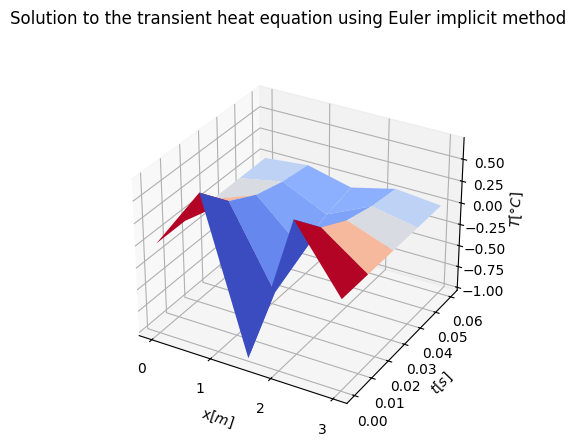

In [11]:
# Input variables and solution variable
x_mesh = np.linspace(0, 3 * np.pi, 5)
t_mesh = np.linspace(0, 0.06, 5)
alpha = 100.0
results_backward = euler_implicit(x_mesh, t_mesh, alpha)

# Plotting and plot handles
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
XX, TT = np.meshgrid(x_mesh, t_mesh)
surf = ax.plot_surface(XX, TT, results_backward, cmap=cm.coolwarm)
MX = int(x_mesh[-1] / np.pi)
plt.xticks(np.arange(0, MX + 1) * np.pi, labels=list(map(str, np.arange(0, MX + 1))))
plt.xlabel(r"x$ [m]$")
ax.set_zlabel(r"$T [\degree C]$")
plt.ylabel(r"$t [s]$")
plt.suptitle("Solution to the transient heat equation using Euler implicit method")
plot_handles_12 = (fig, [ax])

In [12]:
grader.check("q1_2")

q1_2 results: All test cases passed!

### Reflect on the results
1. The Backward Euler method requires solving a linear system at each time step. Explain why this is computationally more expensive than Forward Euler, and suggest strategies to reduce the cost.

This is computationally more expensive than forward euler as you have to conduct a root solving problem for each time step and at each distance. 

### Part 2: Implementing Backward Euler with Sparse Matrix Definition

**Overview**

In this exercise, you will use a sparse matrix representation to implement the backward Euler method for the heat equation. Sparse matrices store only non-zero entries, which reduces memory usage and computation time, making this approach highly efficient for large spatial grids and large-scale linear systems.

#### Instructions

1. **Add Sparse Matrix Function to `discretization.py`**:
   - Add a new function in your `discretization.py` file with the following header and details:

     **Function Name**: `define_A_DB_sparse`

     **Arguments**:
     - `nx` (`int`): Number of spatial discretization points.
     - `fo` (`float`): Fourier number (dimensionless), which controls time-step stability.

     **Returns**:
     - `scipy.sparse.csc_matrix`: A sparse matrix of shape `(nx-2, nx-2)` for the Dirichlet Backward Euler method, created using `scipy.sparse.spdiags`. This matrix represents the discretization for the implicit Euler method in sparse format.

     - **Description**:
       - This function defines the sparse matrix `A_DB` using `scipy.sparse.spdiags`, leveraging sparse storage to reduce memory and computation requirements.
       - For more information on `spdiags`, refer to the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.spdiags.html).

2. **Implement the Sparse Backward Euler Integration in the Notebook**:
   - After importing `define_A_DB_sparse` from `discretization.py`, implement a function in your notebook with the following header and details:

     **Function Name**: `euler_implicit_sparse`

     **Arguments**:
     - `x_mesh` (`npt.NDArray`): A 1D array of grid points representing the spatial domain.
     - `t_mesh` (`npt.NDArray`): A 1D array of grid points representing the time domain.
     - `alpha` (`float`): The thermal diffusivity constant in the heat equation.

     **Returns**:
     - `npt.NDArray`: A 2D array with each entry representing the temperature at a given time and spatial point, with dimensions `[len(t_mesh), len(x_mesh)]`.

   - **Function Overview**:
     - The function `euler_implicit_sparse` initializes the temperature profile across the spatial domain.
     - For each time step in `t_mesh`, it updates the temperature profile by solving a linear system with the sparse matrix `A_DB_sparse` and a vector `b_DB`, which includes contributions from boundary conditions and the previous time step.
     - Use the `scipy.sparse.linalg.spsolve` function to solve the sparse linear system efficiently. For details, refer to the [spsolve documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.spsolve.html).

---

**Special Note**: Using sparse matrices with efficient solvers optimizes both memory usage and computational efficiency, making it ideal for large-scale scientific problems. This exercise will help you apply these principles to solve the heat equation with high performance and scalability.


In [13]:
# Import the necessary functions
from discretization import *

In [14]:
# Define the function `euler_implicit_sparse`
def euler_implicit_sparse(x_mesh:npt.NDArray, t_mesh:npt.NDArray, alpha:float)->npt.NDArray:
    """
    About the function
    Args:
        x_mesh
        t_mesh
        alpha
    Returns:
        array              (np.ndarray): Matrix with dimensions [len(t_mesh), len(x_mesh)]
    """
    
    # define fo 
    dt = t_mesh[1]-t_mesh[0]
    dx = x_mesh[1]-x_mesh[0]
    fo = alpha*dt/dx**2

    #define the number of steps 
    Nx = len(x_mesh)
    Nt = len(t_mesh)

    #initialize the temperature matrix
    T = np.zeros((Nx, Nx))
    T[0,:] = np.sin(x_mesh)
    T[:,0] = 0
    T[:,-1]= 0

    # Initialize the A and b matricies 
    A = define_A_DB_sparse(Nx, fo)
    lbc = 0.0
    rbc = 0.0
    b_DF = define_B_DF(Nx, lbc, rbc)

    #make a for loop to calulate the next point
    for i in range(1,Nt):
        yk = T[i-1, 1:-1]
        b_DB = yk + fo*b_DF
        T[i, 1:-1] = scipy.sparse.linalg.spsolve(A,b_DB)
        

    return T

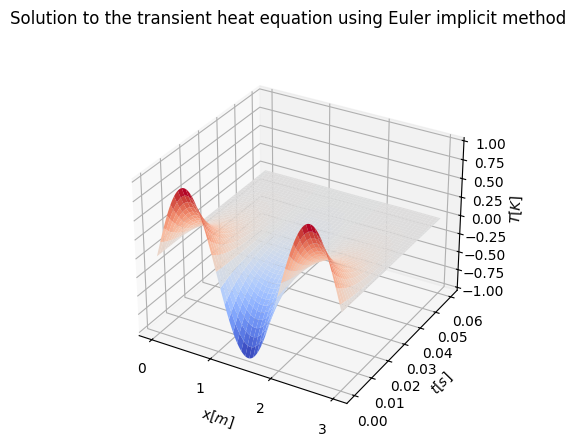

In [15]:
# Input variables and solution variable
x_mesh = np.linspace(0, 3 * np.pi, 501)
t_mesh = np.linspace(0, 0.06, 501)
alpha = 100.0
results_backward = euler_implicit_sparse(x_mesh, t_mesh, alpha)

# Plotting and plot handles
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# BEGIN SOLUTION
XX, TT = np.meshgrid(x_mesh, t_mesh)
surf = ax.plot_surface(XX, TT, results_backward, cmap=cm.coolwarm)
MX = int(x_mesh[-1] / np.pi)
plt.xticks(np.arange(0, MX + 1) * np.pi, labels=list(map(str, np.arange(0, MX + 1))))
plt.xlabel(r"x$ [m]$")
ax.set_zlabel(r"$T [K]$")
plt.ylabel(r"$t [s]$")
plt.suptitle("Solution to the transient heat equation using Euler implicit method")
plot_handles_12 = (fig, [ax])

**Check yourself: Do you get the same solution as before? Is the computation running faster than before?**

Yes the solutions obtained from solving the sparse matrixe are the same to that of solving the backwards euler matrix in the previous question. With the only difference being the number of points which creates a much smoother final solution. Aditionally this solution is much faster computationally then the backward euler method. 